<h1 align=Middle><font size = 6>Project - Market Sales Predictions </font></h1>

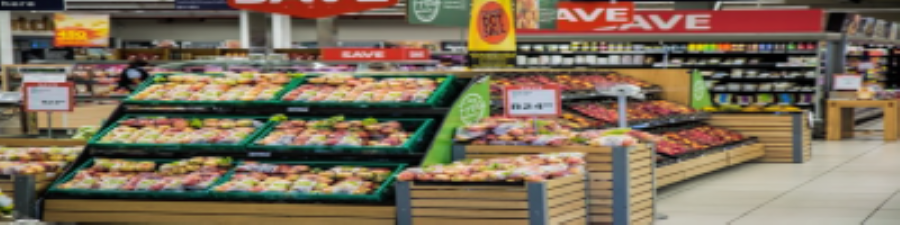

<h1>Table of contents</h1>
<div class="alert alert-block alert-info" style="margin-top: 20px">
     
1. <a href="#item1">Problem Statement</a>
2. <a href="#item2">Hypothesis Generation</a>  
3. <a href="#item3">Loading Packages and Data</a>  
4. <a href="#item4">Data Structure and Content</a>  
5. <a href="#item5">Exploratory Data Analysis</a>
    
   5.a <a href="#item6">Univariate Analysis</a>    
   5.b <a href="#item7">Bivariate Analysis</a> 
    
6. <a href="#item8">Missing Value Treatment</a>  
7. <a href="#item9">Feature Engineering</a>  
8. <a href="#item10">Feature Transformations</a>
    
   8.a <a href="#item11">Creating variable Item_Visibility_Mean_Ratio</a>
    
   8.b <a href="#item12">Categorical Variables — One Hot Encoding</a>
    
   8.c <a href="#item13">Exporting Data</a>
     
9. <a href="#item14">Modeling</a>
    
   9.a <a href="#item15">Linear Regression</a>
    
   9.b <a href="#item16">Ridge Regression Model</a>
    
   9.c <a href="#item17">Decision Tree Model</a>
    
   9.d <a href="#item17">Random Forrest Model</a>
    
   9.e <a href="#item18">XGBoost</a> 
    
10. <a href="#item19">Summary</a>
    
</div>    
<br>
<hr>

### 1. Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. 
Now each product has a certain attributes that sets it apart from other products, same is the case with each store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help 
the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

### 2. Hypothesis Generation 

The 4 big factors affecting the products sales are the following:
   - *Store level : City type, store capacity, population density, ambiance, Marketing, competitors*
   - *Customer level: Job profile, Family size, Income range, Ethnicity, Past purchase history* 
   - *Product level: Utility, Display area, visibility of the store, adversibility*
   - *Macro level: Environment, Economic Growth* 
        

### 3. Loading Packages and Data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 25,10

In [3]:
train_sample= r"C:\Users\Owner\Desktop\projects\Big Mart Sales Prediction\train_sample.csv"
df= pd.read_csv(train_sample)
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
test_sample= r"C:\Users\Owner\Desktop\projects\Big Mart Sales Prediction\test_sample.csv"
df_test= pd.read_csv(test_sample)
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

### 4. Data structure and content 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape
df['source']='train'

In [7]:
#The test data should have 1 column less as it is missing the target variable
df_test.shape
df_test['source']='test'

In [8]:
#quick glance into the feature names of the train and test datasets
print(df.columns)
print(df_test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source'],
      dtype='object')


In [9]:
df_comb = df_test.append(df)


In [10]:
df_comb.shape

(14204, 13)

In [11]:
df_comb.describe()


Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### 5. Exploratory Data Analysis 


In [12]:
# Check for duplicates

In [13]:
idsUnique = len(set(df_comb.Item_Identifier))
idsTotal = df_comb.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 12645 duplicate IDs for 14204 total entries


### 5.a Univariable Analysis 

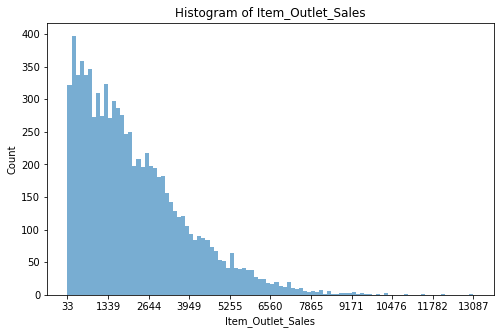

In [14]:

count, bin_edges = np.histogram(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales'].plot(kind='hist', figsize=(8, 5), bins=100, alpha=0.6,xticks=bin_edges)

plt.title('Histogram of Item_Outlet_Sales') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Item_Outlet_Sales') # add x-label

plt.show()

In [15]:
## We can see from this histogram that our dataset is continuous. 
## It is a right skewd variable and would need some data transformation to treat its skewness

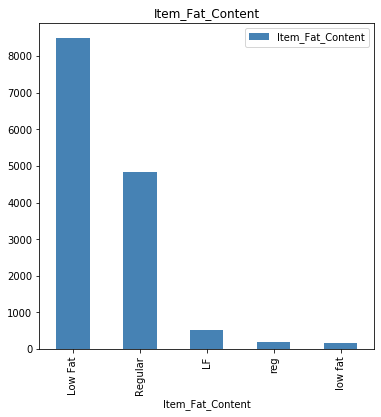

In [16]:
# Independent Variables (Categorical Variables)

df_fat = pd.DataFrame(df_comb['Item_Fat_Content'].value_counts())
df_fat.plot(kind='bar', figsize=(6, 6), color='steelblue')
plt.xlabel('Item_Fat_Content')
plt.title('Item_Fat_Content')

# annotate value labels to each country
for index, value in enumerate(df_fat): 
    label = format(value, 's')
plt.show()     

In [17]:
# Since 'low Fat', 'LF','low fat' are all the same, they can be combined into the same bar graph
df_comb['Item_Fat_Content'] = df_comb['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                                 'reg':'Regular',
                                                                 'low fat':'Low Fat'})

In [18]:
df_fat = pd.DataFrame(df_comb['Item_Fat_Content'].value_counts())
df_fat

Item_Fat_Content
Low Fat              9185
Regular              5019

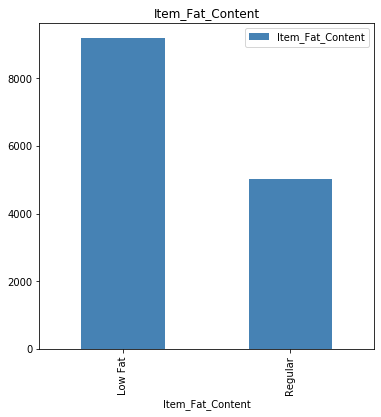

In [19]:
df_fat = pd.DataFrame(df_comb['Item_Fat_Content'].value_counts())
df_fat.plot(kind='bar', figsize=(6, 6), color='steelblue')
plt.xlabel('Item_Fat_Content')
plt.title('Item_Fat_Content')

# annotate value labels to each country
for index, value in enumerate(df_fat): 
    label = format(value, 's')
plt.show()     

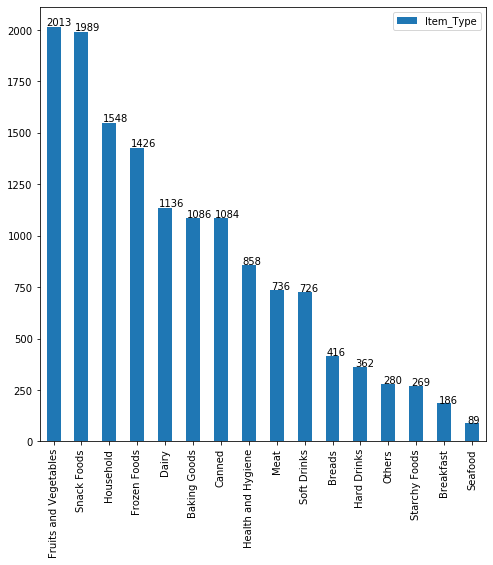

In [20]:
df_itype = pd.DataFrame(df_comb['Item_Type'].value_counts())
ax = df_itype.plot(kind='bar',figsize=(8, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()     

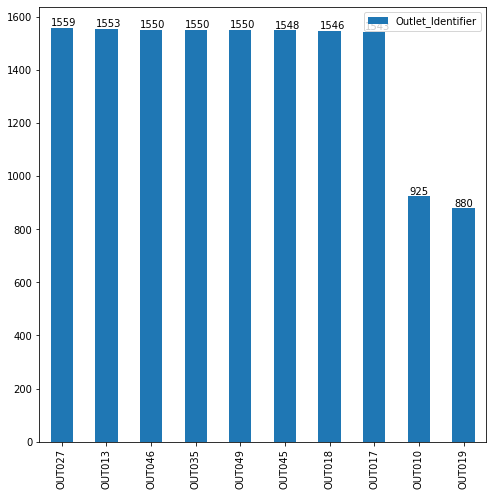

In [21]:
df_Oid = pd.DataFrame(df_comb['Outlet_Identifier'].value_counts())
ax = df_Oid.plot(kind='bar',figsize=(8, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()     

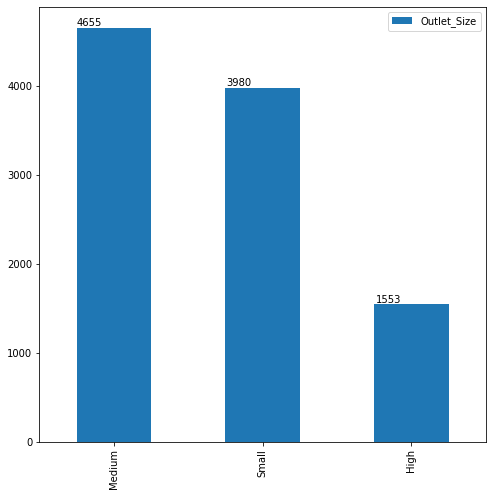

In [22]:
df_Osiz = pd.DataFrame(df_comb['Outlet_Size'].value_counts())
ax = df_Osiz.plot(kind='bar',figsize=(8, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

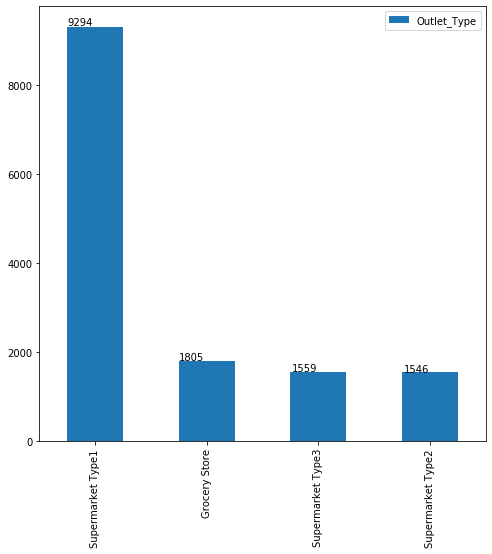

In [23]:
df_Otyp = pd.DataFrame(df_comb['Outlet_Type'].value_counts())
ax = df_Otyp.plot(kind='bar',figsize=(8, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

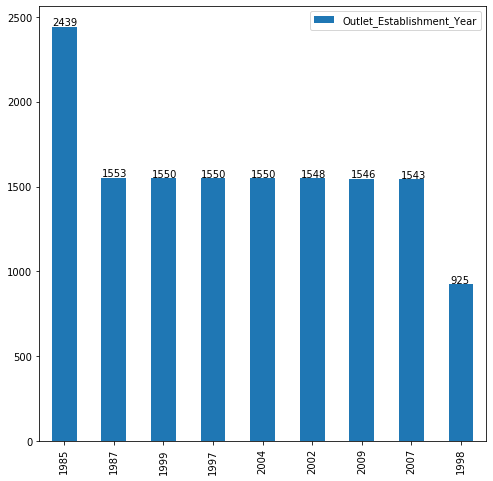

In [24]:
df_Oey = pd.DataFrame(df_comb['Outlet_Establishment_Year'].value_counts())
ax =df_Oey.plot(kind='bar',figsize=(8, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [25]:
## Observation is that; supermarket type 1 are more popular 

### 5.b Bivariable Analysis 

In [26]:
import seaborn as sb

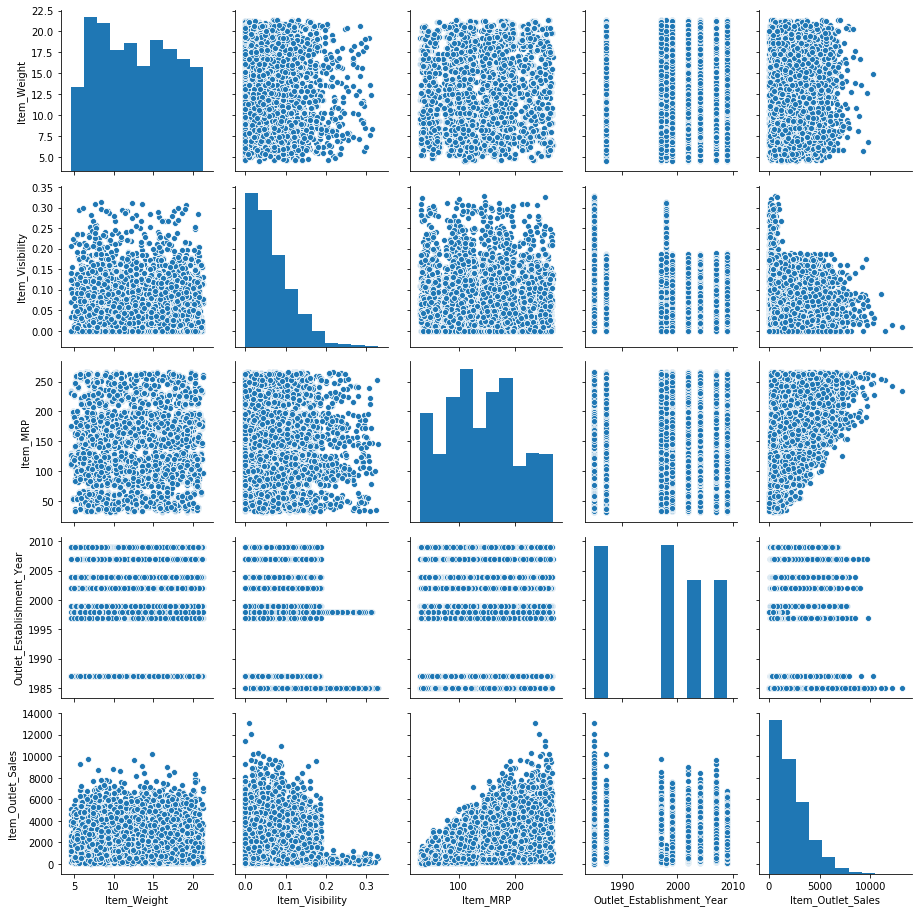

In [27]:
# Independent (numeric variables )
sb.pairplot(df_comb)

In [28]:
# There seems to be no clear cut pattern in the item Weight
# Item_visibility is right skewed and should be transformed to curb its skewness
# We can see 4 different distributions for item_MRP
# Item visibility has a minimum of 0 which is quite unusual since items must be visible, so they could be missing values 

In [29]:
#Correlation between Numerical Predictors and Target variable
corr =df_comb.select_dtypes(include=[np.number]).corr()
corr

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.015901  0.036236   
Item_Visibility              -0.015901         1.000000 -0.006351   
Item_MRP                      0.036236        -0.006351  1.000000   
Outlet_Establishment_Year     0.000645        -0.083678  0.000141   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                 0.000645           0.014123  
Item_Visibility                            -0.083678          -0.128625  
Item_MRP                                    0.000141           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

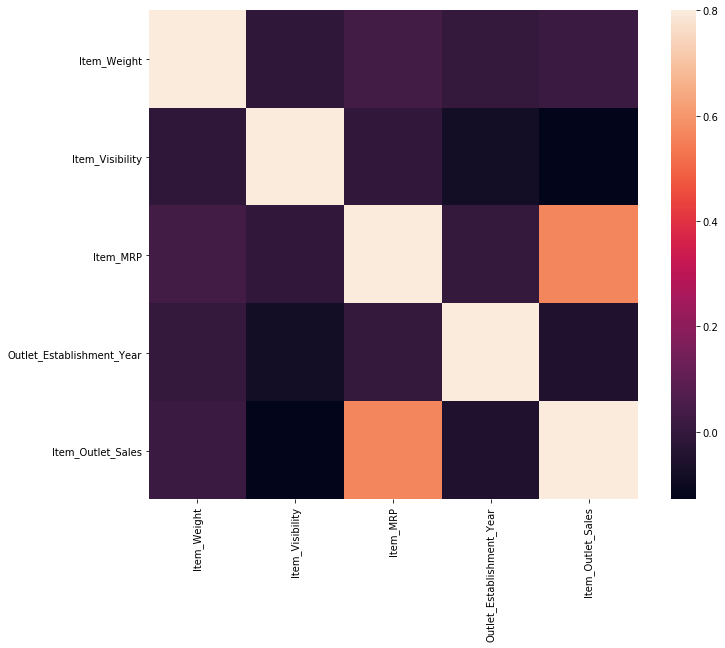

In [30]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

Item_Visibility is the feature with the lowest correlation with our target variable. 
Therefore, the less visible the product is in the store the higher the price will be. 
This is curious since from the initial assumptions this variables was expected to have high impact in the sales increase. Nevertheless, since this is not an expected behaviour and we should investigate. Moreover, this feature has a negative correlation with all of the other features. 
Furthermore, the most positive correlation belongs to Item_MRP .

### Target Variable vs Independent Categorical Variables

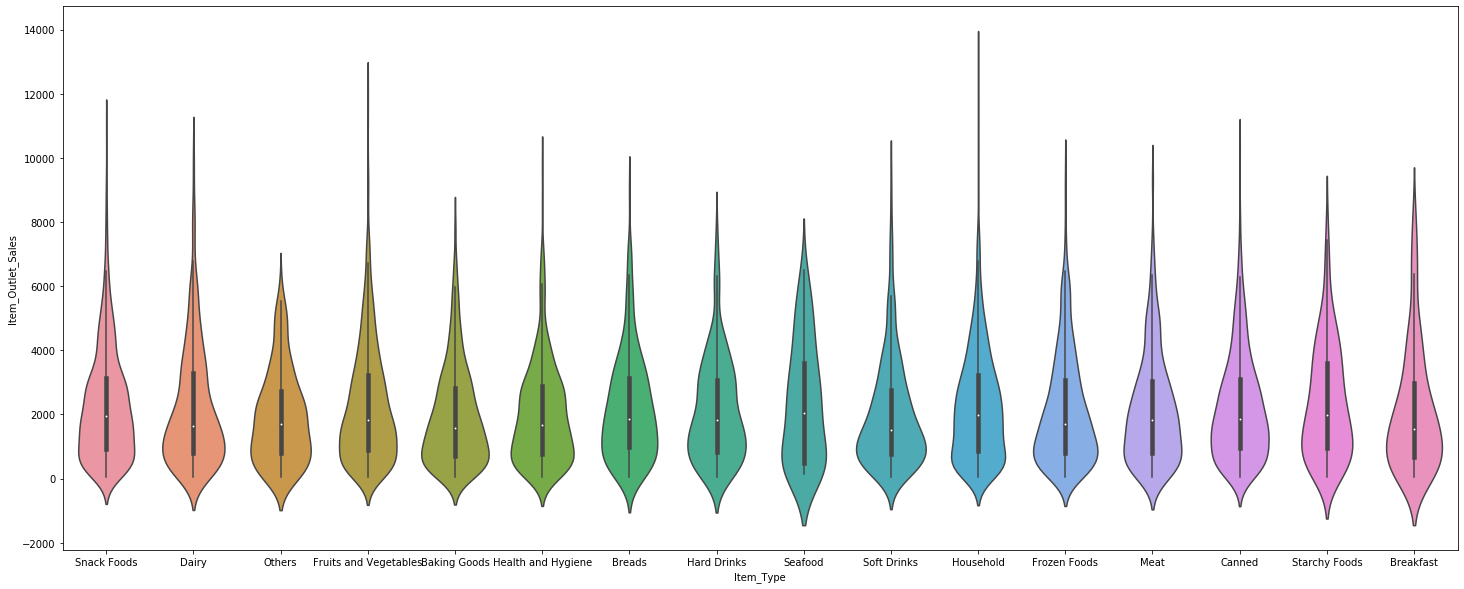

In [31]:

sns.violinplot(x = "Item_Type",
               y = "Item_Outlet_Sales", 
               data = df_comb, 
               cut=2, scale='area', 
               scale_hue=True, gridsize=100, 
               width=0.8, 
               inner='box', 
               split=False, 
               dodge=True, 
               orient=None, 
               linewidth=None, 
               color=None, 
               palette=None, 
               saturation=0.75, 
               ax=None, 
               )




In [32]:
# Distribution of the item_outlet_sales across the categories of item_type is no very distinct 
#and same is the case with the Item_Fat_Content 

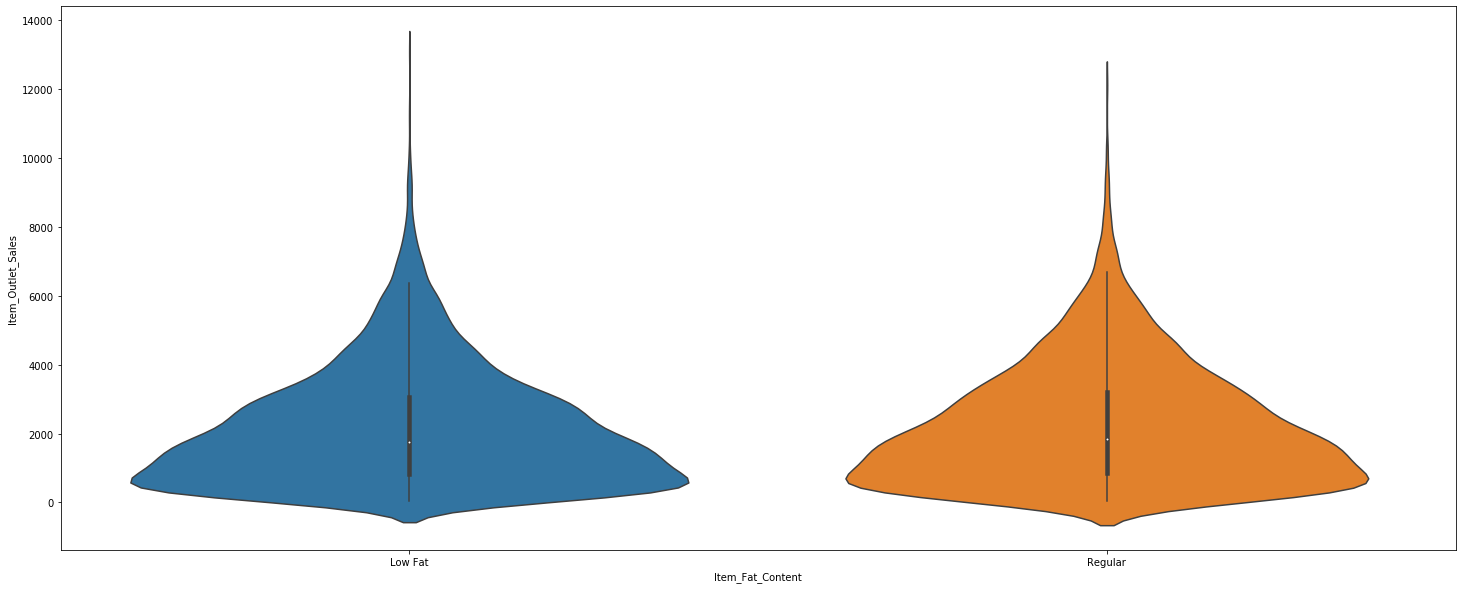

In [33]:
sns.violinplot(x = "Item_Fat_Content",
               y = "Item_Outlet_Sales", 
               data = df_comb, 
               cut=2, scale='area', 
               scale_hue=True, gridsize=100, 
               width=0.8, 
               inner='box', 
               split=False, 
               dodge=True, 
               orient=None, 
               linewidth=None, 
               color=None, 
               palette=None, 
               saturation=0.75, 
               ax=None, 
               )

In [34]:
# Distribution of the item_outlet_sales across the categories of item_type is no very distinct 
#and same is the case with the Item_Fat_Content 

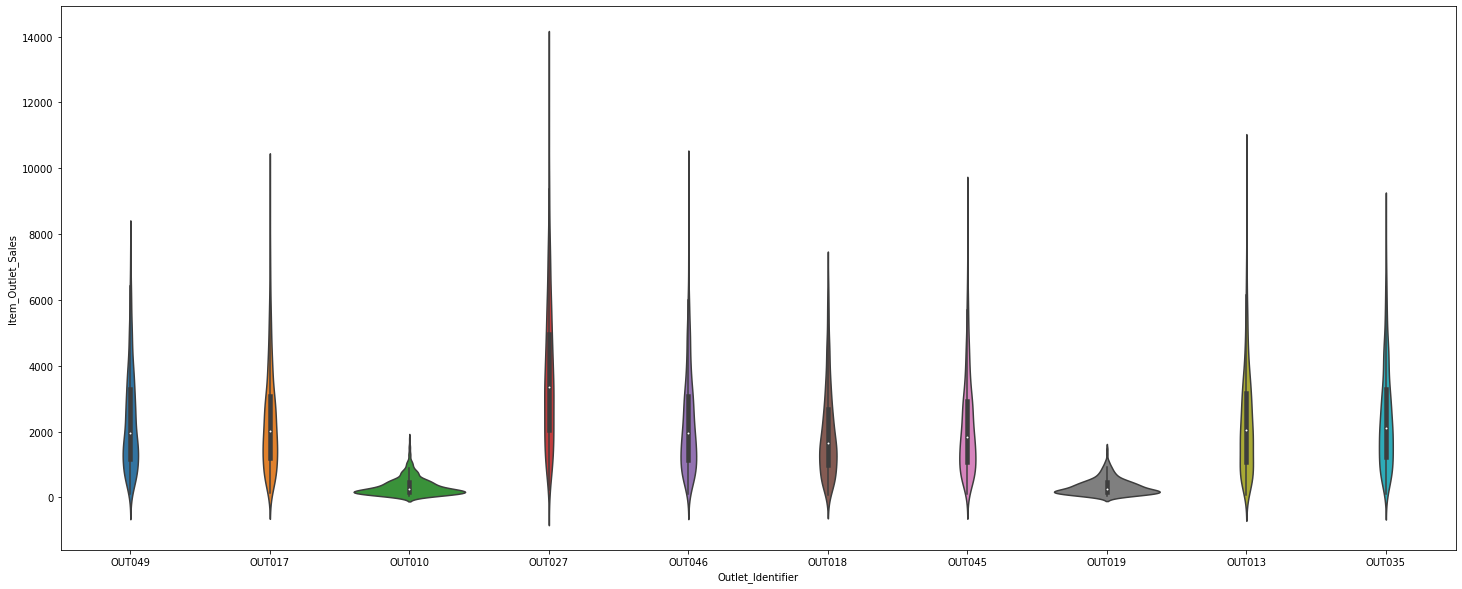

In [35]:
sns.violinplot(x = "Outlet_Identifier",
               y = "Item_Outlet_Sales", 
               data = df_comb, 
               cut=2, scale='area', 
               scale_hue=True, gridsize=100, 
               width=0.8, 
               inner='box', 
               split=False, 
               dodge=True, 
               orient=None, 
               linewidth=None, 
               color=None, 
               palette=None, 
               saturation=0.75, 
               ax=None, 
               )

In [36]:
# The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar 
#and very much different from the rest of the categories of Outlet_Identifier.

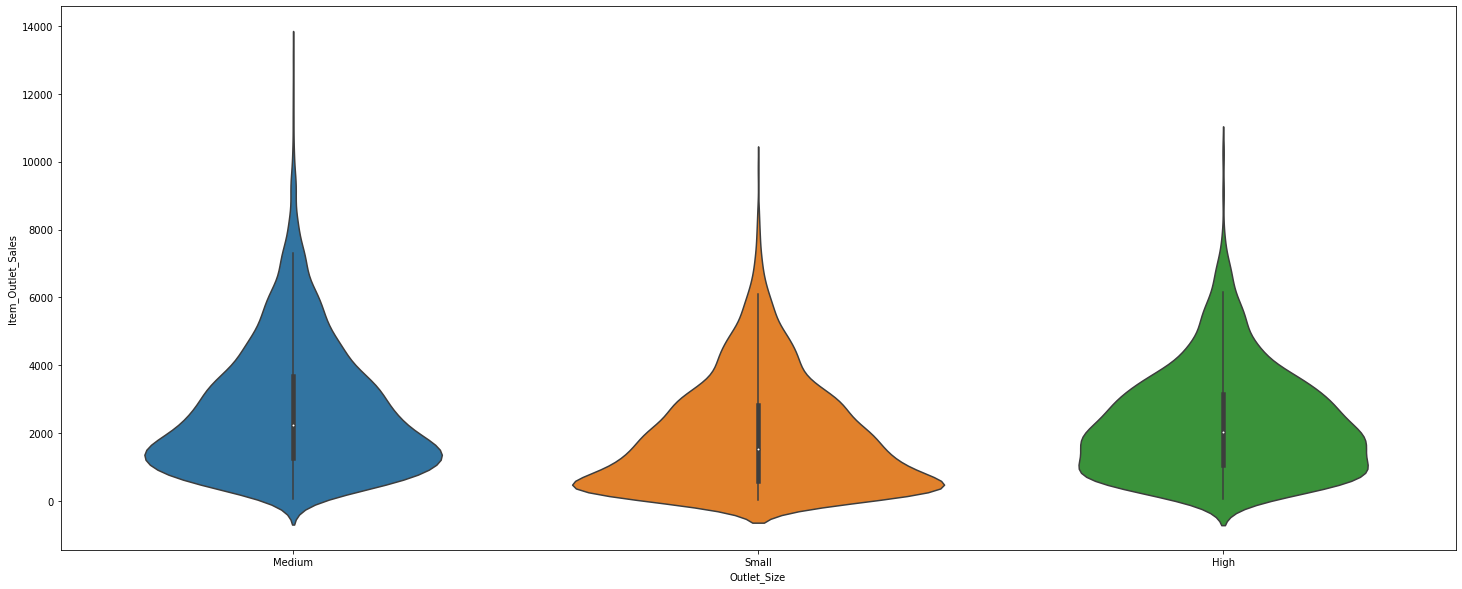

In [37]:
sns.violinplot(x = "Outlet_Size",
               y = "Item_Outlet_Sales", 
               data = df_comb, 
               cut=2, scale='area', 
               scale_hue=True, gridsize=100, 
               width=0.8, 
               inner='box', 
               split=False, 
               dodge=True, 
               orient=None, 
               linewidth=None, 
               color=None, 
               palette=None, 
               saturation=0.75, 
               ax=None, 
               )

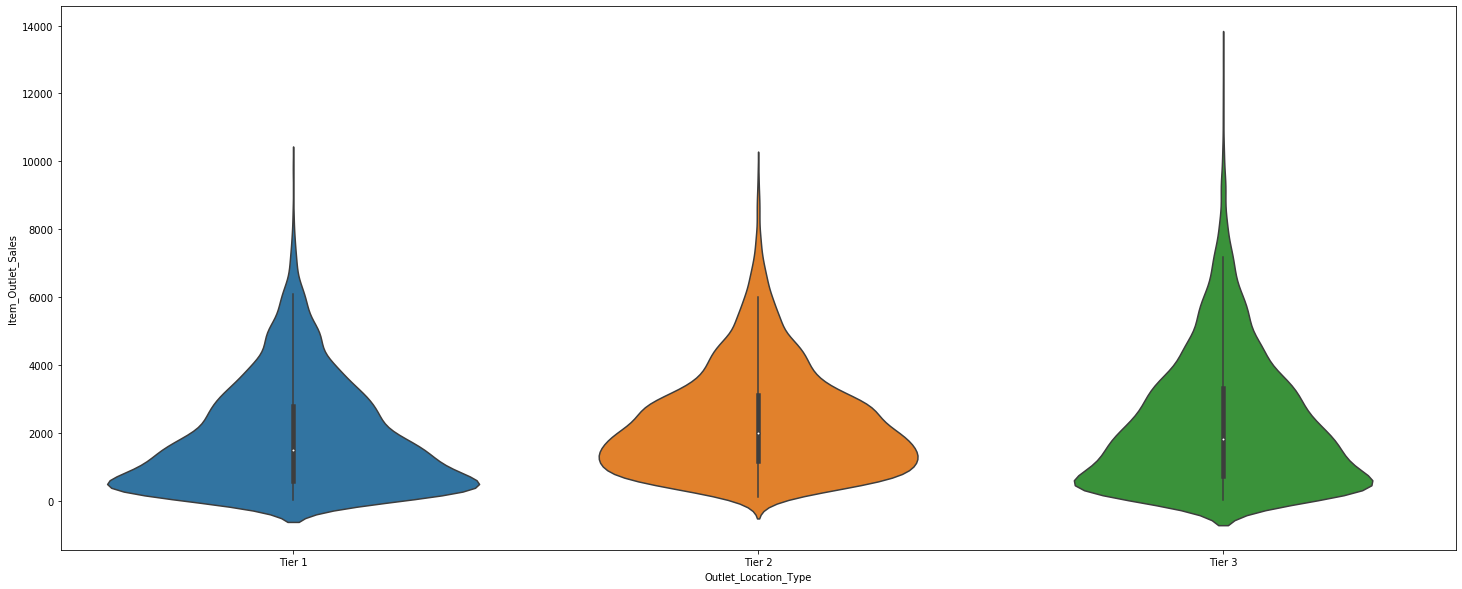

In [38]:
sns.violinplot(x = "Outlet_Location_Type",
               y = "Item_Outlet_Sales", 
               data = df_comb, 
               cut=2, scale='area', 
               scale_hue=True, gridsize=100, 
               width=0.8, 
               inner='box', 
               split=False, 
               dodge=True, 
               orient=None, 
               linewidth=None, 
               color=None, 
               palette=None, 
               saturation=0.75, 
               ax=None, 
               )

In [39]:
# Tier 1 and Tier 3 locations of Outlet_Location_Type look similar


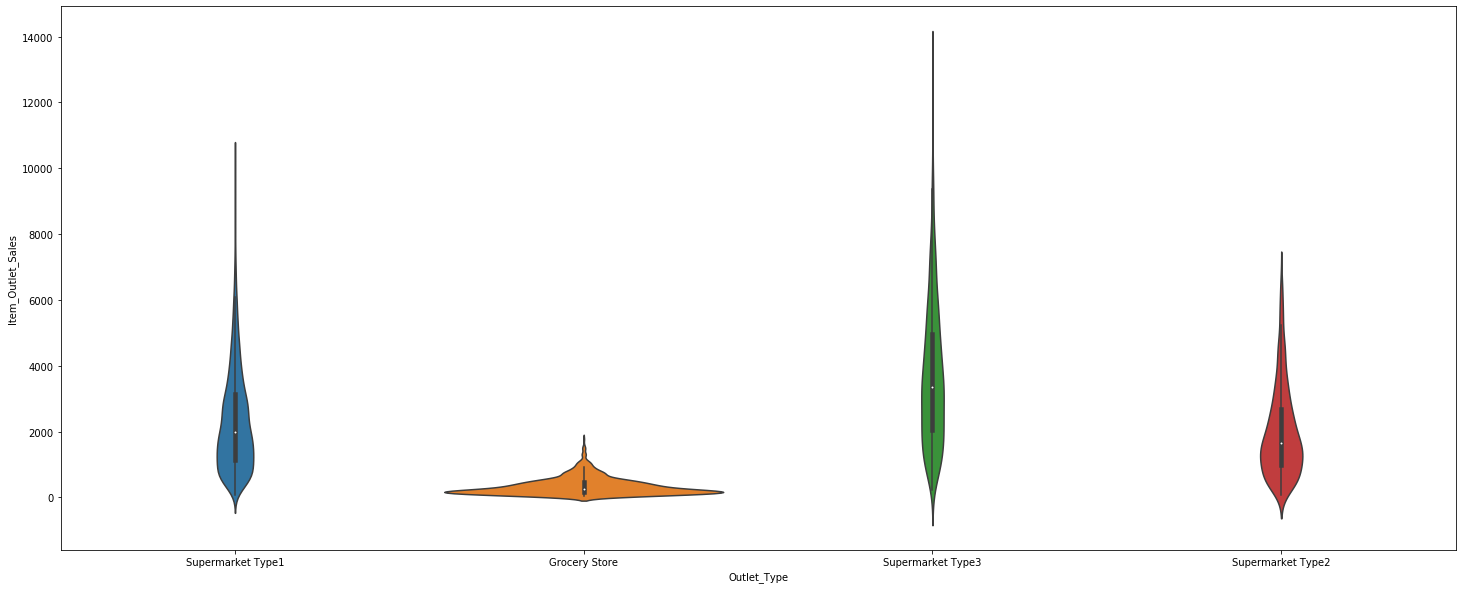

In [40]:
sns.violinplot(x = "Outlet_Type",
               y = "Item_Outlet_Sales", 
               data = df_comb, 
               cut=2, scale='area', 
               scale_hue=True, gridsize=100, 
               width=0.8, 
               inner='box', 
               split=False, 
               dodge=True, 
               orient=None, 
               linewidth=None, 
               color=None, 
               palette=None, 
               saturation=0.75, 
               ax=None, 
               )

In [41]:
# Grocery Store has most of its data points around the lower sales values as compared to the other categories

### 6. Missing Values Treatment 

In [42]:
df_comb.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
Item_Outlet_Sales            5681
dtype: int64

##### Imputing the mean for Item_Weight missing values 
As we can see above, we have missing values for Item_Weight, Outlet_Size, and Item_Outlet_Sales:
    
- The missing Values in Item_Outlet_sales belong to the test datasets so that one can be ignored
- The missing Values for the Item_Weight will be taken care of by replacing them by mean values per item identifiers 
- The missing Values for the Outlet_size will be taken care of by replacing them by the mode values per item identifiers

In [43]:
item_avg_weight = df_comb.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [44]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(df_comb['Item_Weight'].isnull()))
df_comb['Item_Weight'] = df_comb[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(df_comb['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [45]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = df_comb.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [46]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(df_comb['Outlet_Size'].isnull()))
df_comb['Outlet_Size'] = df_comb[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(df_comb['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


In [47]:
# We noticed earlier that Item visibility had a minimum of 0 that was quite unusual let's take a better look 

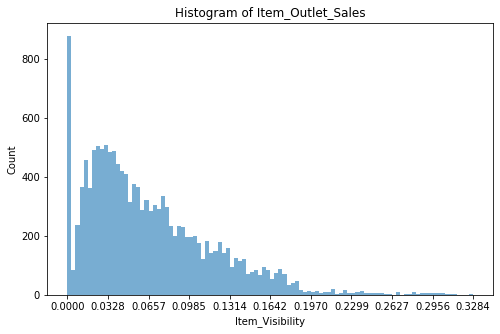

In [48]:
count, bin_edges = np.histogram(df['Item_Visibility'])
df_comb['Item_Visibility'].plot(kind='hist', figsize=(8, 5), bins=100, alpha=0.6,xticks=bin_edges)

plt.title('Histogram of Item_Outlet_Sales') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Item_Visibility') # add x-label

plt.show()

In [49]:
# Since items must be visible in order to be sold, we can assume that the item with a 0 visibility are missing values, 
#let's replace those by the mean values of item visibility by item identifiers.

In [50]:
visibility_item_avg = df_comb.pivot_table(values='Item_Visibility', index='Item_Identifier')
print(visibility_item_avg)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]


In [51]:
# Replacing Zero's in item visibility variable by mean item identifierwise 

def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility
print ('Original #zeros: %d'%sum(df_comb['Item_Visibility'] == 0))
df_comb['Item_Visibility'] = df_comb[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(df_comb['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


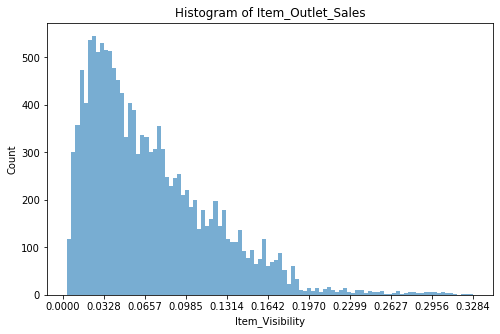

In [52]:
count, bin_edges = np.histogram(df['Item_Visibility'])
df_comb['Item_Visibility'].plot(kind='hist', figsize=(8, 5), bins=100, alpha=0.6,xticks=bin_edges)

plt.title('Histogram of Item_Outlet_Sales') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Item_Visibility') # add x-label

plt.show()

### 7. Feature Engineering 

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model's performance. Let's try to create some new features for our dataset.
In this section we will create the following new features:
    
- **Item_Type_new**: Broader categories for the variable _Item_type_.
- **Item_category**: Categorical variable derived from _Item_Identifier_.
- **Outlet_Years**: Years of Operation for _outlets_.
- **price_per_unit_wt**: _Item_MRP_/_Item_Weight_.
- **Item_MRP_clusters**: Binned feature for _Item_MRP_.

### Determine the years of operation of a store

In [53]:
# Since the data is from 2013, we can perform the following:

df_comb['Outlet_Years']= 2013 - df_comb['Outlet_Establishment_Year']
df_comb['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### Create a broad cathegory of Item_Type

In [54]:
#Get the first two characters of ID:
df_comb['Item_Type_Combined'] = df_comb['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df_comb['Item_Type_Combined'] = df_comb['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable','DR':'Drinks'})
df_comb['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

### 8.Feature Transformations

### 8.a Creating variable Item_Visibility_Mean_Ratio

In [55]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
df_comb['Item_Visibility_MeanRatio'] = df_comb.apply(func,axis=1).astype(float)
df_comb['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

### 8.b Categorical Variables — One Hot Encoding

In [56]:
#Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal 
#variables into numeric types.Let’s start with turning all categorical variables into numerical values 
#using LabelEncoder() (Encode labels with value between 0 and n_classes-1). After that, we can use get_dummies 
#to generate dummy variables from these numerical categorical variables

In [57]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df_comb['Outlet'] = le.fit_transform(df_comb['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    df_comb[i] = le.fit_transform(df_comb[i])

In [58]:
# One hot coding will remove this variable and generate 3 new variables. 
# Each will have binary numbers — 0 (if the category is not present) and 1(if category is present)

In [59]:
#Dummy Variables:
df_comb = pd.get_dummies(df_comb, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
df_comb.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
source                        object
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

### 8.c. Exporting Data

Final step is to convert data back into train and test data sets

In [60]:
df_comb.head()

Item_Identifier  Item_Weight  Item_Visibility    Item_Type  Item_MRP  \
0           FDW58       20.750         0.007565  Snack Foods  107.8622   
1           FDW14        8.300         0.038428        Dairy   87.3198   
2           NCN55       14.600         0.099575       Others  241.7538   
3           FDQ58        7.315         0.015388  Snack Foods  155.0340   
4           FDY38       13.600         0.118599        Dairy  234.2300   

  Outlet_Identifier  Outlet_Establishment_Year source  Item_Outlet_Sales  \
0            OUT049                       1999   test                NaN   
1            OUT017                       2007   test                NaN   
2            OUT010                       1998   test                NaN   
3            OUT017                       2007   test                NaN   
4            OUT027                       1985   test                NaN   

   Outlet_Years  ...  Outlet_0  Outlet_1  Outlet_2  Outlet_3  Outlet_4  \
0            14  ...         0         0         0         0         0   
1             6  ...         0         0         1         0         0   
2            15  ...         1         0         0         0         0   
3             6  ...         0         0         1         0         0   
4            28  ...         0         0         0         0         0   

   Outlet_5  Outlet_6  Outlet_7  Outlet_8  Outlet_9  
0         0         0         0         0         1  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         1         0         0         0         0  

[5 rows x 36 columns]

In [61]:
#Drop the columns which have been converted to different types:
df_comb.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
#Divide into test and train:
train = df_comb.loc[df_comb['source']=="train"]
test = df_comb.loc[df_comb['source']=="test"]
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv("train_modified_2.csv",index=False)
test.to_csv("test_modified_2.csv",index=False)

### 9. Model Building

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [63]:
Model_df = pd.read_csv("train_modified_2.csv")


In [64]:
print(Model_df.shape)


(8523, 33)


In [65]:
train_data_columns = Model_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
X = Model_df[train_data_columns]
y = Model_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### 9.a Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
LR = LinearRegression(normalize=True)

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [120]:
#Print model report:
y_pred = LR.predict(X_test)
print('Variance score: %.2f' % LR.score(X_train,y_train))
print('R2 : %.2f' %   r2_score(y_test, y_pred))
print('RMSE: %.2f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Variance score: 0.56
R2 : 0.57
RMSE: 1097.76


In [68]:
#Perform cross-validation:
cv_score = cross_val_score(LR, X ,y , cv=20)
np.mean(cv_score)

0.5591067225782634

### 9.b Ridge Regression Model

In [69]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
RR.fit(X_train,y_train)
y_predridge= RR.predict(X_test)


In [98]:
print('Variance score: %.2f' % RR.score(X_train,y_train))
print('R2 : %.2f' %   r2_score(y_test, y_predridge))
print('MSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_predridge)))

Variance score: 0.56
R2 : 0.48
MSE: 1204.87


In [71]:
#Perform cross-validation:
cv_score = cross_val_score(RR, X ,y , cv=20)
np.mean(cv_score)

0.5584261804549413

In [72]:
# Perform GridsearchCV to find the best value of alpha to use for this model
from sklearn.model_selection import GridSearchCV
parameters = [{'alpha': [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'fit_intercept':[True, False],
    'normalize':[True, False]}]
grid_search = GridSearchCV(estimator = RR,
                            param_grid = parameters,
                            cv=10,
                            n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [73]:
grid_search.best_score_

0.5574235596574569

In [74]:
grid_search.best_params_

{'alpha': 1, 'fit_intercept': False, 'normalize': True}

In [119]:
RR_2 = Ridge(alpha=1,normalize=True)
RR_2.fit(X_train,y_train)
y_predridge= RR_2.predict(X_test)
print('Variance score: %.2f' % RR_2.score(X_train,y_train))
print('R2 : %.2f' %   r2_score(y_test, y_predridge))
print('RMSE: %.2f' %  np.sqrt(metrics.mean_squared_error(y_test, y_predridge)))

Variance score: 0.46
R2 : 0.48
RMSE: 1204.87


In [76]:
cv_score = cross_val_score(RR_2, X ,y , cv=20)
np.mean(cv_score)

0.4631999953186493

### 9.C Decision Tree Model

In [77]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(splitter="best",max_depth=15, min_samples_leaf=100)
DT

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [78]:
# Fit the model
DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [79]:
# Prediction
DT_pred=DT.predict(X_test)

In [116]:
# Evaluation 
print('Variance score: %.2f' % DT.score(X_train,y_train))
print('R2 : %.2f' %   r2_score(y_test, DT_pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, DT_pred)))

Variance score: 0.61
R2 : 0.58
RMSE: 1078.20


In [81]:
cv_score_DT = cross_val_score(DT, X ,y , cv=20)
np.mean(cv_score_DT)

0.5876298705202866

### 9.d Random Forrest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=10, max_depth=15, min_samples_leaf=100)
RF

RandomForestClassifier(max_depth=15, min_samples_leaf=100, n_estimators=10)

In [83]:
y_train=y_train.astype('int')
RF.fit(X_train,y_train)


RandomForestClassifier(max_depth=15, min_samples_leaf=100, n_estimators=10)

In [84]:
RF_pred=RF.predict(X_test)

In [85]:
estimator = RF.estimators_[5]

In [86]:
feature_names= X_train.columns.unique().tolist()
feature_names

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Years',
 'Item_Visibility_MeanRatio',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3',
 'Item_Type_Combined_0',
 'Item_Type_Combined_1',
 'Item_Type_Combined_2',
 'Outlet_0',
 'Outlet_1',
 'Outlet_2',
 'Outlet_3',
 'Outlet_4',
 'Outlet_5',
 'Outlet_6',
 'Outlet_7',
 'Outlet_8',
 'Outlet_9']

In [91]:
class_name_df= pd.DataFrame(Model_df['Item_Outlet_Sales'])
class_name= class_name_df.columns.unique().tolist()
class_name

['Item_Outlet_Sales']

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot',
               feature_names=feature_names,
               class_names= class_name,
               rounded= True, proportion = False,
               precision = 3,filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-O','tree.png','-Gdpi=600'])
from IPython.display import Image
Image(filename='tree.png')

In [115]:
print('Variance score: %.2f' % RF.score(X_train,y_train))
print('R^2 : %.2f' %   r2_score(y_test, y_predridge))
print('RMSE: %.2f' %  np.sqrt(metrics.mean_squared_error(y_test, y_predridge)))

Variance score: 0.10
R^2 : 0.48
RMSE: 1204.87


### 9.e XGBoost

In [106]:
conda install -c conda-forge xgboost

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - xgboost

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [107]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Owner\Downloads\Anaconda

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    conda-4.8.4                |           py37_0         3.1 MB  anaconda
    libxgboost-0.90            |                1         3.9 MB  anaconda
    py-xgboost-0.90            |           py37_1          80 KB  anaconda
    ------------------------------------------------------------
                                           Total:         7.0 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         anaconda/win-64::libxgboost-0.90-1
  py-xgboost         anaconda/win-64::py-xgboost-0.90-py37_1

The following packages will be

In [108]:
import xgboost as xgb

In [111]:
XGmodel = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [117]:
XGmodel.fit(X_train,y_train)
XG_pred=XGmodel.predict(X_test)

[10:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [118]:
print('Variance score: %.2f' % XGmodel.score(X_train,y_train))
print('R^2 : %.2f' %   r2_score(y_test, XG_pred))
print('RMSE: %.2f' %  np.sqrt(metrics.mean_squared_error(y_test, XG_pred)))

Variance score: 0.64
R^2 : 0.60
RMSE: 1060.81


### 10. Summary 

The ML algorithm that performed the best was the XGBoost with RMSE = 1060.